<a href="https://colab.research.google.com/github/podo1skii/spbu_cldocs/blob/master/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Линейная регрессия

Данные содержатся в файле `data/lin_reg.txt`. Прочитать их можно следующим так:

In [98]:
import numpy as np
from matplotlib import pyplot as plt

dir = "./lin_reg.txt"
D = np.loadtxt(dir, delimiter=',')
D = (D - D.mean())/D.std()
np.random.shuffle(D)

При выполнении заданий **нельзя** пользоваться `scikit-learn` и т.п., только `NumPy`/`JAX`/`TF`/`PyTorch` и `matplotlib`/`seaborn`/`plotly`/etc.

1. Нарисуйте график среднеквадратичной ошибки в зависимости от параметра регуляризации $\alpha$, используя полные данные для обучения и для тестирования. 
2. Подготовьте исходные данные для 5 fold CV.
3. С помощью CV найдите оптимальное значение $\alpha$ на какой-нибудь сетке значений.
4. Постройте валидационную кривую. 
5. Постройте кривую обучения.

In [99]:
def linear(x, w, b):
    y = np.dot(x, w) + b
    return y

In [100]:
def mse(y_predicted, y, w, b, a):
    result = (((y_predicted - y)**2).sum() + (a * (w**2).sum() + (b**2).sum()) / 2) / y.shape[0]
    return result

In [101]:

def get_grads(y_predicted, x, y, w, b, alpha):
    b_gradient = (-2 * (y - y_predicted).sum() + alpha * 2 * b)/y.shape[0]
    w_gradient = (np.dot((-2 * (y - y_predicted)).T, x) + alpha * 2 * w.sum())/y.shape[0]
    return w_gradient.T, b_gradient

In [102]:

def train_test_split(data, prop):
    n = round(len(data)*prop)
    return data[:n, :-1], data[n:, :-1], data[:n, -1], data[n:, -1]

In [103]:
w = np.random.random((D.shape[1]-1, 1))
b = np.random.random((1, 1))

In [104]:
w

array([[0.95171195],
       [0.78565105],
       [0.87795328],
       [0.37834309]])

In [105]:
b

array([[0.15959522]])

Text(0, 0.5, 'loss')

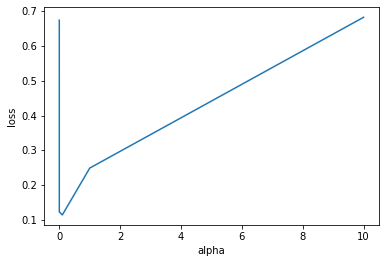

In [106]:

alpha_grid = [0.0001, 0.001, 0.1, 1.0, 10]

X_train, X_test, Y_train, Y_test = train_test_split(D, 0.6)
Y_train, Y_test = Y_train.reshape((len(Y_train), 1)), Y_test.reshape((len(Y_test), 1)) 

losses = []

for alpha in alpha_grid:
  for epoch in range(500):
      y_predicted = linear(X_train, w, b).reshape((len(Y_train), 1))

      loss = mse(y_predicted, Y_train, w, b, alpha)
      
      w_gradient, b_gradient = get_grads(y_predicted, X_train, Y_train, w, b, alpha)
      w -= w_gradient*0.01
      b -= b_gradient*0.01
  
  y_predicted = linear(X_test, w, b).reshape((len(Y_test), 1))
  loss = mse(y_predicted, Y_test, w, b, alpha)
  losses.append(loss)
        

plt.plot(alpha_grid, losses[::-1])
plt.xlabel('alpha')
plt.ylabel('loss')

In [116]:
def get_cross_validation_data(d, f):
    lst = []
    for i in range(f):
      lst.append(d[i*len(d)//f: (i+1)*len(d)//f])
    return lst

In [117]:
data = get_cross_validation_data(D, PARTS)
len(data)

5

In [118]:
train_losses = []
test_losses = []

for alpha in alpha_grid:
  local_train_losses = np.array([])
  local_test_losses = np.array([])

  for i in range(5):
    parts_train, parts_test = np.vstack(tuple(data[:i] + data[i+1:])), data[i]
    X_train, Y_train = parts_train[:, :-1], parts_train[:, -1]
    X_test, Y_test = parts_test[:, :-1], parts_test[:, -1]
    Y_train, Y_test = Y_train.reshape((len(Y_train), 1)), Y_test.reshape((len(Y_test), 1)) 
    
    for epoch in range(500):
      y_predicted = linear(X_train, w, b).reshape((len(Y_train), 1))
      loss = mse(y_predicted, Y_train, w, b, alpha)
      if epoch == 500 - 1:
        local_train_losses = np.append(local_train_losses, loss) 
      w_gradient, b_gradinet = get_grads(y_predicted, X_train, Y_train, w, b, alpha)
      w -= w_gradient*0.01
      b -= b_gradient*0.01
    y_predicted = linear(X_test, w, b).reshape((len(Y_test), 1))
    loss = mse(y_predicted, Y_test, w, b, alpha)
    local_test_losses = np.append(local_test_losses, loss)
  train_losses.append(local_train_losses.mean())
  test_losses.append(local_test_losses.mean())

In [119]:
train_losses

[0.0692844638404432,
 0.07681752340880056,
 0.09122351400981846,
 0.13496462891770017,
 0.4622744067295649]

In [120]:
test_losses

[0.06929738803704304,
 0.07736063970144039,
 0.10225665756151106,
 0.24001494424652375,
 1.4654723137822054]

In [121]:
idx = list.index(test_losses, min(test_losses))
print('Оптимальное значение параметра alpha:', alpha_grid[idx])

Оптимальное значение параметра alpha: 0.0001


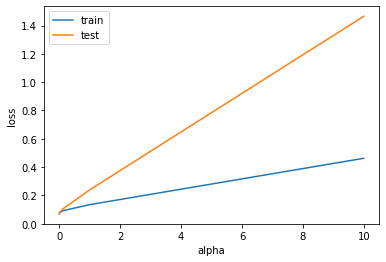

In [123]:
plt.plot(alpha_grid, train_losses, label='train')
plt.plot(alpha_grid, test_losses, label='test')

plt.ylabel('loss')
plt.xlabel('alpha')
plt.legend()